In [1]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import numpy as np

In [2]:

# Path to your CSV file
file_path = "C:\\Users\\naima\\OneDrive\\Desktop\\Naima\\data_demo_normalized_overtime_CA.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   STATE_NAME  STATE COUNTY_NAME  COUNTY        DATE          CASE_TYPE  \
0  California    6.0     Alameda  6001.0  2020-07-27  Complete Coverage   
1  California    6.0     Alameda  6001.0  2020-07-27   Partial Coverage   
2  California    6.0     Alameda  6001.0  2020-07-28  Complete Coverage   
3  California    6.0     Alameda  6001.0  2020-07-28   Partial Coverage   
4  California    6.0     Alameda  6001.0  2020-07-29  Complete Coverage   

   CASES_White  CASES_Black  CASES_Asian  CASES_Native  ...  hispanic_pop  \
0          0.0          0.0          0.0           0.0  ...      373055.0   
1          0.0          0.0          0.0           0.0  ...      373055.0   
2          0.0          0.0          0.0           0.0  ...      373055.0   
3          0.0          0.0          0.0           0.0  ...      373055.0   
4          0.0          0.0          0.0           0.0  ...      373055.0   

   nothispanic_pop  nothispanic_white_pop  nothispanic_black_pop  \
0        1298274.0

In [3]:
# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Verify the conversion by displaying the first few rows
print(df.head())

   STATE_NAME  STATE COUNTY_NAME  COUNTY       DATE          CASE_TYPE  \
0  California    6.0     Alameda  6001.0 2020-07-27  Complete Coverage   
1  California    6.0     Alameda  6001.0 2020-07-27   Partial Coverage   
2  California    6.0     Alameda  6001.0 2020-07-28  Complete Coverage   
3  California    6.0     Alameda  6001.0 2020-07-28   Partial Coverage   
4  California    6.0     Alameda  6001.0 2020-07-29  Complete Coverage   

   CASES_White  CASES_Black  CASES_Asian  CASES_Native  ...  hispanic_pop  \
0          0.0          0.0          0.0           0.0  ...      373055.0   
1          0.0          0.0          0.0           0.0  ...      373055.0   
2          0.0          0.0          0.0           0.0  ...      373055.0   
3          0.0          0.0          0.0           0.0  ...      373055.0   
4          0.0          0.0          0.0           0.0  ...      373055.0   

   nothispanic_pop  nothispanic_white_pop  nothispanic_black_pop  \
0        1298274.0      

In [4]:
# Define the specific dates
CA_6_12_dates = ['2021-06-23', '2021-12-23', '2022-06-23']
CA_6_12_dates = pd.to_datetime(CA_6_12_dates)

# Filter data for the specific dates
filtered_df = df[df['DATE'].isin(CA_6_12_dates)]

# Display the filtered data
print(filtered_df.head())

      STATE_NAME  STATE COUNTY_NAME  COUNTY       DATE          CASE_TYPE  \
662   California    6.0     Alameda  6001.0 2021-06-23  Complete Coverage   
663   California    6.0     Alameda  6001.0 2021-06-23   Partial Coverage   
1028  California    6.0     Alameda  6001.0 2021-12-23  Complete Coverage   
1029  California    6.0     Alameda  6001.0 2021-12-23   Partial Coverage   
1392  California    6.0     Alameda  6001.0 2022-06-23  Complete Coverage   

      CASES_White  CASES_Black  CASES_Asian  CASES_Native  ...  hispanic_pop  \
662     40.433564    40.489673    66.681770     48.266562  ...      373055.0   
663     42.466121    44.730105    71.383183     54.003484  ...      373055.0   
1028    45.621684    55.686453    78.195709     64.376018  ...      373055.0   
1029    47.817793    60.147640    83.202614     71.045682  ...      373055.0   
1392    46.947582    60.909160    82.629929     70.455695  ...      373055.0   

      nothispanic_pop  nothispanic_white_pop  nothispani

C:\Users\naima\AppData\Local\Temp\ipykernel_34800\1189751336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Group'] = filtered_df['COUNTY_NAME'].apply(lambda x: 'Funded' if x in funded_counties else 'Non-Funded')


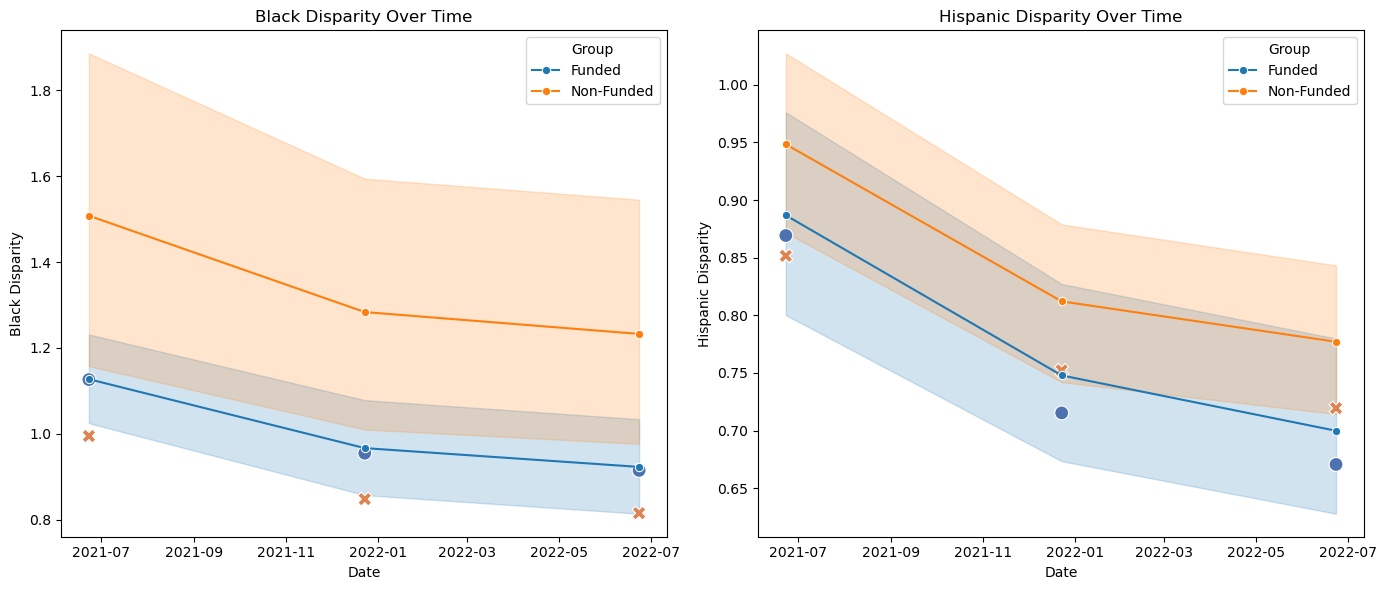

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming filtered_df is your DataFrame
# Define funded and non-funded groups
funded_counties = ['Alameda', 'Sonoma', 'San Diego']
filtered_df['Group'] = filtered_df['COUNTY_NAME'].apply(lambda x: 'Funded' if x in funded_counties else 'Non-Funded')

# Calculate median values for each group and date
median_df = filtered_df.groupby(['Group', 'DATE']).agg({'Black_Disparity': 'median', 'Hispanic_Disparity': 'median'}).reset_index()

# Sort data by DATE for plotting
filtered_df = filtered_df.sort_values(by='DATE')

plt.figure(figsize=(14, 6))

# Line plot for Black_Disparity with median annotations
plt.subplot(1, 2, 1)
sns.lineplot(data=filtered_df, x='DATE', y='Black_Disparity', hue='Group', marker='o')
sns.scatterplot(data=median_df, x='DATE', y='Black_Disparity', hue='Group', style='Group', s=100, marker='D', legend=False, palette='deep')
plt.title('Black Disparity Over Time')
plt.xlabel('Date')
plt.ylabel('Black Disparity')

# Line plot for Hispanic_Disparity with median annotations
plt.subplot(1, 2, 2)
sns.lineplot(data=filtered_df, x='DATE', y='Hispanic_Disparity', hue='Group', marker='o')
sns.scatterplot(data=median_df, x='DATE', y='Hispanic_Disparity', hue='Group', style='Group', s=100, marker='D', legend=False, palette='deep')
plt.title('Hispanic Disparity Over Time')
plt.xlabel('Date')
plt.ylabel('Hispanic Disparity')

plt.tight_layout()

# Save the figure before calling plt.show()
plt.savefig(r'C:\Users\naima\Downloads\Black_Hisp_Disparity_Over_Time.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [6]:
# Path to your CSV file
file_path = r'C:\Users\naima\OneDrive\Desktop\Naima\sorted_merged_CO_df.csv'

# Load the CSV file into a DataFrame
df1 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df1.head())


   STATE_NAME  STATE      COUNTY_NAME  COUNTY        DATE          CASE_TYPE  \
0    Missouri     29          Jackson   29095  2021-06-22  Complete Coverage   
1     Alabama      1        Jefferson    1073  2021-06-24   Partial Coverage   
2    Virginia     51  Alexandria city   51510  2021-06-25  Complete Coverage   
3    Virginia     51  Alexandria city   51510  2021-06-25   Partial Coverage   
4  California      6          Alameda    6001  2021-06-23  Complete Coverage   

   CASES_White  CASES_Black  CASES_Asian  CASES_Native  ...  \
0    40.500403    20.772987    56.266817     16.488372  ...   
1     0.011301     0.011074     0.485700      3.438841  ...   
2    24.913536    20.014939    28.637479     26.753507  ...   
3    24.811461    22.066132    25.108511     39.378758  ...   
4    40.433564    40.489673    66.681770     48.266562  ...   

                                  CBSA title       CBSA 2012 pop  \
0                         Kansas City, MO-KS             2038724   
1   

In [7]:
import pandas as pd

# Assuming sorted_merged_df is already defined and contains the data

# Create a list of unique county-state combinations that received additional funding
additional_funding_list_names = [
    ('Alabama', 'Montgomery'), ('California', 'Alameda'), ('California', 'San Diego'),
    ('California', 'Sonoma'), ('Connecticut', 'Hartford'), ('Georgia', 'DeKalb'),
    ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Worcester'), ('Missouri', 'Franklin'),
    ('Texas', 'Harris'), ('Texas', 'Bexar')
]

# Add the 'ADD_Fund' column to sorted_merged_df using STATE_NAME and COUNTY_NAME
df1['ADD_Fund'] = df1.apply(
    lambda row: 1 if (row['STATE_NAME'], row['COUNTY_NAME']) in additional_funding_list_names else 0,
    axis=1
)

# Display the DataFrame to verify the new column
print(df1.head())

# Display the counts of 1s and 0s in the ADD_Fund column
add_fund_counts = df1['ADD_Fund'].value_counts()
print(add_fund_counts)


   STATE_NAME  STATE      COUNTY_NAME  COUNTY        DATE          CASE_TYPE  \
0    Missouri     29          Jackson   29095  2021-06-22  Complete Coverage   
1     Alabama      1        Jefferson    1073  2021-06-24   Partial Coverage   
2    Virginia     51  Alexandria city   51510  2021-06-25  Complete Coverage   
3    Virginia     51  Alexandria city   51510  2021-06-25   Partial Coverage   
4  California      6          Alameda    6001  2021-06-23  Complete Coverage   

   CASES_White  CASES_Black  CASES_Asian  CASES_Native  ...  \
0    40.500403    20.772987    56.266817     16.488372  ...   
1     0.011301     0.011074     0.485700      3.438841  ...   
2    24.913536    20.014939    28.637479     26.753507  ...   
3    24.811461    22.066132    25.108511     39.378758  ...   
4    40.433564    40.489673    66.681770     48.266562  ...   

        CBSA 2012 pop  County 2012 pop  2013 code  Black_Pop_Proportion  \
0             2038724           677377          1              0.

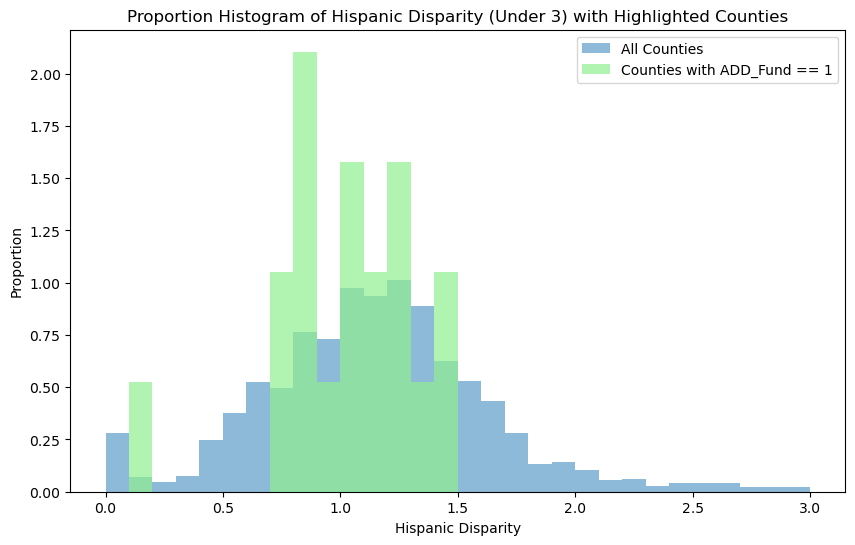

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sorted_merged_df is already defined and contains the data

# Filter data to include only Black_Disparity values under 3
filtered_df =df1[df1['Hispanic_Disparity'] < 3]

# Create the histogram for the Black_Disparity column with limited range
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(filtered_df['Hispanic_Disparity'], bins=30, range=(0, 3), alpha=0.5, density=True, label='All Counties')

# Highlight the counties with ADD_Fund == 1 and Black_Disparity under 3
highlighted = filtered_df[filtered_df['ADD_Fund'] == 1]
plt.hist(highlighted['Hispanic_Disparity'], bins=bins, alpha=.7, color='lightgreen', density=True, label='Counties with ADD_Fund == 1')

# Adding labels and title
plt.xlabel('Hispanic Disparity')
plt.ylabel('Proportion')
plt.title('Proportion Histogram of Hispanic Disparity (Under 3) with Highlighted Counties')
plt.legend()

# Show the plot
plt.show()



<Figure size 1000x600 with 0 Axes>

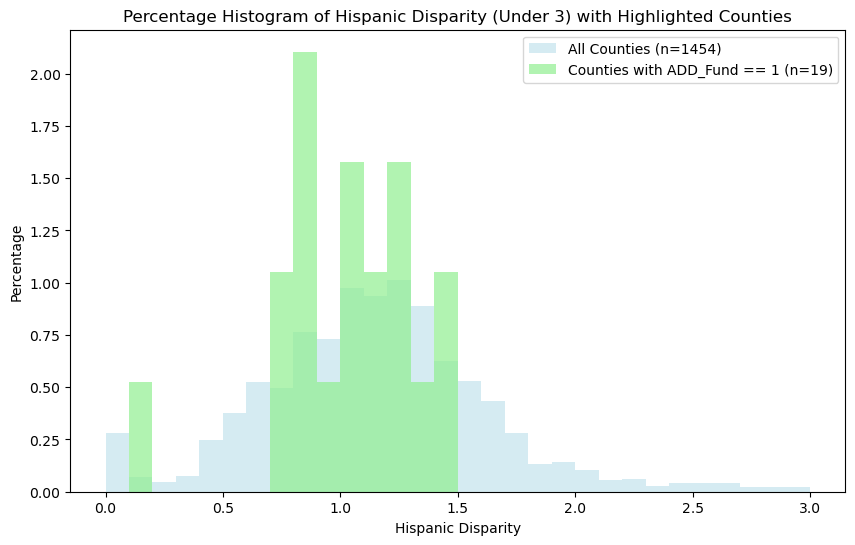

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sorted_merged_df is already defined and contains the data

# Filter data to include only Hispanic_Disparity values under 3
filtered_df = df1[df1['Hispanic_Disparity'] < 3]

# Calculate the total number of counties in each category
total_counties_all = filtered_df.shape[0]
total_counties_funded = filtered_df[filtered_df['ADD_Fund'] == 1].shape[0]

# Create the histogram for the Hispanic_Disparity column with limited range
plt.figure(figsize=(10, 6))

# Plot for all counties
n_all, bins_all, _ = plt.hist(filtered_df['Hispanic_Disparity'], bins=30, range=(0, 3), alpha=0.5, density=True, label='All Counties')

# Plot for counties with ADD_Fund == 1
highlighted = filtered_df[filtered_df['ADD_Fund'] == 1]
n_highlighted, bins_highlighted, _ = plt.hist(highlighted['Hispanic_Disparity'], bins=bins_all, alpha=0.7, color='lightgreen', density=True, label='Counties with ADD_Fund == 1')

# Convert density to percentage
n_all_percentage = n_all * 100  # Convert density to percentage
n_highlighted_percentage = n_highlighted * 100  # Convert density to percentage

# Replot with percentages
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Hispanic_Disparity'], bins=bins_all, alpha=0.5, density=True, label='All Counties', color='lightblue')
plt.hist(highlighted['Hispanic_Disparity'], bins=bins_highlighted, alpha=0.7, color='lightgreen', density=True, label='Counties with ADD_Fund == 1')

# Adding labels and title
plt.xlabel('Hispanic Disparity')
plt.ylabel('Percentage')
plt.title('Percentage Histogram of Hispanic Disparity (Under 3) with Highlighted Counties')

# Add count to the legend
legend_labels = [
    f'All Counties (n={total_counties_all})',
    f'Counties with ADD_Fund == 1 (n={total_counties_funded})'
]
plt.legend(legend_labels)

# Show the plot
plt.show()


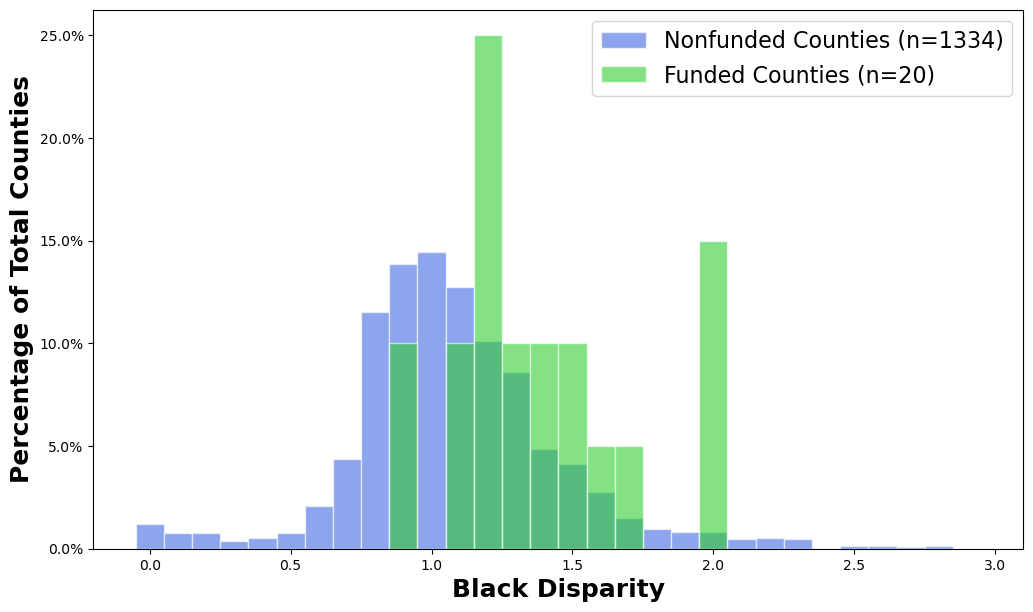

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1 is already defined and contains the data

# Filter data to include only Black_Disparity values under 3
filtered_df = df1[df1['Black_Disparity'] < 3]

# Calculate the total number of counties in each category
total_counties_all = filtered_df.shape[0]
total_counties_funded = filtered_df[filtered_df['ADD_Fund'] == 1].shape[0]

# Create the histogram for the Black_Disparity column with limited range
plt.figure(figsize=(12, 7))

# Plot for all counties
n_all, bins_all = np.histogram(filtered_df['Black_Disparity'], bins=30, range=(0, 3))
percent_all = (n_all / total_counties_all) * 100
plt.bar(bins_all[:-1], percent_all, width=np.diff(bins_all), alpha=0.6, label='Nonfunded Counties', color='royalblue', edgecolor='white')

# Plot for counties with ADD_Fund == 1
highlighted = filtered_df[filtered_df['ADD_Fund'] == 1]
n_highlighted, bins_highlighted = np.histogram(highlighted['Black_Disparity'], bins=bins_all)
percent_highlighted = (n_highlighted / total_counties_funded) * 100
plt.bar(bins_highlighted[:-1], percent_highlighted, width=np.diff(bins_highlighted), alpha=0.6, color='limegreen', edgecolor='white', label='Funded Counties')

# Adjusting labels with larger font sizes and removing the title
plt.xlabel('Black Disparity', fontsize=18, fontweight='bold')
plt.ylabel('Percentage of Total Counties', fontsize=18, fontweight='bold')

# Add count to the legend with rounded percentages
legend_labels = [
    f'Nonfunded Counties (n={total_counties_all})',
    f'Funded Counties (n={total_counties_funded})'
]
plt.legend(legend_labels, fontsize=16)

# Format y-axis labels as percentages with one decimal place
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))

# Save the plot with higher resolution
plt.savefig(r'C:\Users\naima\Downloads\Black_Funding_Histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


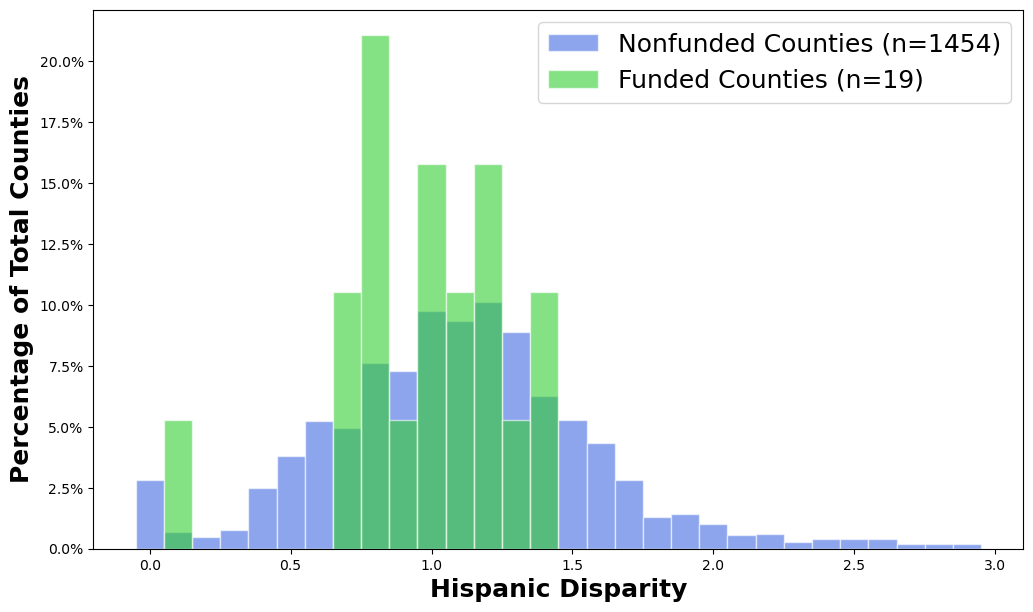

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1 is already defined and contains the data

# Filter data to include only Hispanic_Disparity values under 3
filtered_df = df1[df1['Hispanic_Disparity'] < 3]

# Calculate the total number of counties in each category
total_counties_all = filtered_df.shape[0]
total_counties_funded = filtered_df[filtered_df['ADD_Fund'] == 1].shape[0]

# Create the histogram for the Hispanic_Disparity column with limited range
plt.figure(figsize=(12, 7))

# Plot for all counties
n_all, bins_all = np.histogram(filtered_df['Hispanic_Disparity'], bins=30, range=(0, 3))
percent_all = (n_all / total_counties_all) * 100
plt.bar(bins_all[:-1], percent_all, width=np.diff(bins_all), alpha=0.6, label='Nonfunded Counties', color='royalblue', edgecolor='white')

# Plot for counties with ADD_Fund == 1
highlighted = filtered_df[filtered_df['ADD_Fund'] == 1]
n_highlighted, bins_highlighted = np.histogram(highlighted['Hispanic_Disparity'], bins=bins_all)
percent_highlighted = (n_highlighted / total_counties_funded) * 100
plt.bar(bins_highlighted[:-1], percent_highlighted, width=np.diff(bins_highlighted), alpha=0.6, color='limegreen', edgecolor='white', label='Counties with ADD_Fund == 1')

# Adding labels and title with font adjustments
plt.xlabel('Hispanic Disparity', fontsize=18, fontweight='bold')
plt.ylabel('Percentage of Total Counties', fontsize=18, fontweight='bold')


# Add count to the legend with rounded percentages
legend_labels = [
    f'Nonfunded Counties (n={total_counties_all})',
    f'Funded Counties (n={total_counties_funded})'
]
plt.legend(legend_labels, fontsize=18)

# Format y-axis labels as percentages with one decimal place
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))

plt.savefig(r'C:\Users\naima\Downloads\Hispanic_Funding_Histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
